# Instacart Market Basket Analysis
 
Data Source: https://www.kaggle.com/c/instacart-market-basket-analysis/data <br>

Instacart is an American company that operates a grocery delivery and pick-up service in the United States and Canada. The company offers its services via a website and mobile app. The service allows customers to order groceries from participating retailers with the shopping being done by a personal shopper. Instacart wants us to use their data to predict which previously purchased products will be in user’s next order. This is also called as Market Basket analysis.

# Data Explanation 

We are provided with 6 tables namely -
<li> Orders: This table includes all orders, namely prior, train, and test.
<li> order_products_train: This table includes training orders and indicates whether a product in an order is a reorder or not (through the reordered variable).
<li> order_products_prior: This table includes prior orders. It indicates whether a product in an order is a reorder or not (through the reordered variable).
<li> products: This table includes all products.
<li> aisles: This table includes all aisles.
<li> departments: This table includes all departments.
    
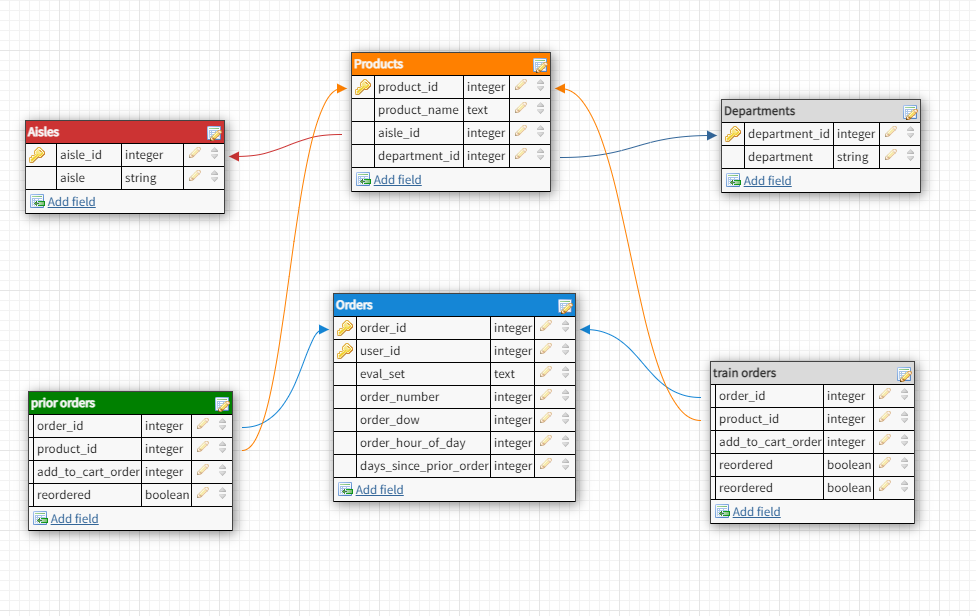

# Machine Learning Problem -

The data science team of Insta-cart wants us to use their outsourced data on customer orders over time to predict which previously purchased products will be in user’s next order. The dataset consists of 6 files, each containing different information of the insta-cart. It contains information about the products, the aisles on which the product is placed, what product was reordered, after how many days did the user come to shop etc.
The dataset is divided into 3 parts Priors, Train, and Test. Prior orders contain information about users and their previous orders. The train and test orders will be used for training and testing of the model. These prior orders will be used for feature engineering. There are almost 50K products and about 3M orders. Also, there is chance that user might or may not order product that were a part of previous orders. Thus ‘None’ can also be answer to user’s next purchase. Therefore, we will have to consider ‘None’ as a separate product.

# Performance Metric 
Mean F1 Score (predefined evaluation metrics)

<hr/>

<h2> 1. Importing packages

In [2]:
# Import Statements
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> 2. Reading Data

In [3]:
# Importing each csv files
orders_df = pd.read_csv('C:/Users/Srinidhi.Karjol/ML/case studies/mycasestudies/instacart-market-basket-analysis/orders.csv')
products_df = pd.read_csv('C:/Users/Srinidhi.Karjol/ML/case studies/mycasestudies/instacart-market-basket-analysis/products.csv')
aisles_df = pd.read_csv('C:/Users/Srinidhi.Karjol/ML/case studies/mycasestudies/instacart-market-basket-analysis/aisles.csv')
department_df = pd.read_csv('C:/Users/Srinidhi.Karjol/ML/case studies/mycasestudies/instacart-market-basket-analysis/departments.csv')
order_products_prior_df = pd.read_csv('C:/Users/Srinidhi.Karjol/ML/case studies/mycasestudies/instacart-market-basket-analysis/order_products__prior.csv')
order_products_train_df = pd.read_csv('C:/Users/Srinidhi.Karjol/ML/case studies/mycasestudies/instacart-market-basket-analysis/order_products__train.csv')

<h2> 3. Understanding Data

<h3> 3.1 Orders 

In [4]:
# Orders data

orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
# total number of orders,users
print("Total orders - ",len(orders_df['order_id'].value_counts()))
print("Total users - ",len(orders_df['user_id'].value_counts()))
print("Shape of dataframe - ", orders_df.shape)

Total orders -  3421083
Total users -  206209
Shape of dataframe -  (3421083, 7)


In [6]:
# Check for NAN in days_since_prior_order
print("Total  Null Values for days_since_prior_order - ",orders_df['days_since_prior_order'].isnull().sum())
orders_df['days_since_prior_order'] = orders_df['days_since_prior_order'].fillna(0.0)
print("-"*40)
orders_df['days_since_prior_order'].head()

Total  Null Values for days_since_prior_order -  206209
----------------------------------------


0     0.0
1    15.0
2    21.0
3    29.0
4    28.0
Name: days_since_prior_order, dtype: float64

In [7]:
#Checking Nan for other columns
print("Total  Null Values for order_dow - ",orders_df['order_dow'].isnull().sum())
print("Total  Null Values for order_hour_of_day - ",orders_df['order_hour_of_day'].isnull().sum())

Total  Null Values for order_dow -  0
Total  Null Values for order_hour_of_day -  0


<h3> 3.2 Products

In [7]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
# total number of products
print("Total number of products - ",len(products_df['product_id'].value_counts()))

Total number of products -  49688


<h3> 3.3 Aisles

In [9]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
# total number of aisles
print("Total number of aisles - ",len(aisles_df['aisle_id'].value_counts()))
print("Aisles")
print("-"*40)
aisles_df['aisle'].value_counts()

Total number of aisles -  134
Aisles
----------------------------------------


ice cream toppings               1
plates bowls cups flatware       1
water seltzer sparkling water    1
shave needs                      1
granola                          1
                                ..
dish detergents                  1
eggs                             1
deodorants                       1
soy lactosefree                  1
spreads                          1
Name: aisle, Length: 134, dtype: int64

<h3>3.4 Departments

In [11]:
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
# total number of departments
print("Total number of departments - ",len(department_df['department_id'].value_counts()))
print("Departments")
print("-"*40)
department_df['department'].value_counts()

Total number of departments -  21
Departments
----------------------------------------


missing            1
bulk               1
personal care      1
alcohol            1
international      1
breakfast          1
deli               1
meat seafood       1
dry goods pasta    1
household          1
produce            1
frozen             1
pets               1
canned goods       1
bakery             1
snacks             1
other              1
beverages          1
pantry             1
babies             1
dairy eggs         1
Name: department, dtype: int64

# 4. Exploratory Data Analysis

In [11]:
# common method to plot bar plots 
# https://seaborn.pydata.org/generated/seaborn.barplot.html
def bar_plot(data, xlabel, ylabel, title):
    plt.figure(figsize=(8,8))
    sns.barplot(data.index, data.values)
    plt.xlabel(xlabel,fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 14)
    plt.xticks(rotation='vertical')
    return plt.show() 

<h3> 4.1 Distribution of train and test data

In [14]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


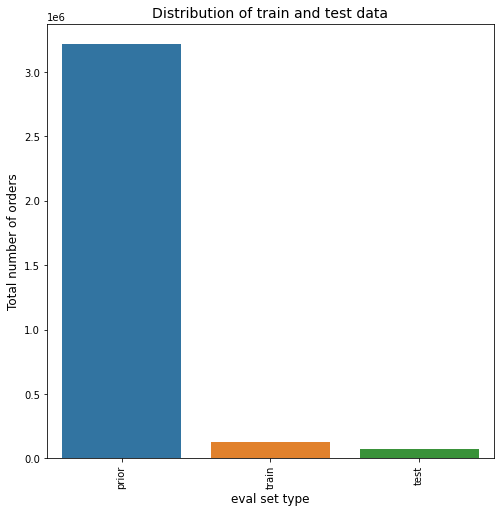

In [15]:
counts = orders_df['eval_set'].value_counts()
bar_plot(counts,'eval set type','Total number of orders','Distribution of train and test data')

In [16]:
# Percentage of data points 

print("Total train orders - ",len(orders_df[orders_df['eval_set']=='train']))
print("Percentage of train orders - ", np.round((len(orders_df[orders_df['eval_set']=='train'])/len(orders_df['eval_set']))*100))
print("Total test orders - ",len(orders_df[orders_df['eval_set']=='test']))
print("Percentage of test orders - ", np.round((len(orders_df[orders_df['eval_set']=='test'])/len(orders_df['eval_set']))*100))
print("Number of prior orders - ",len(orders_df[orders_df['eval_set']=='prior']))
print("Percentage of prior orders - ", np.round((len(orders_df[orders_df['eval_set']=='prior'])/len(orders_df['eval_set']))*100))

Total train orders -  131209
Percentage of train orders -  4.0
Total test orders -  75000
Percentage of test orders -  2.0
Number of prior orders -  3214874
Percentage of prior orders -  94.0


<h3>4.2 On which day of the week were most ordered placed ?

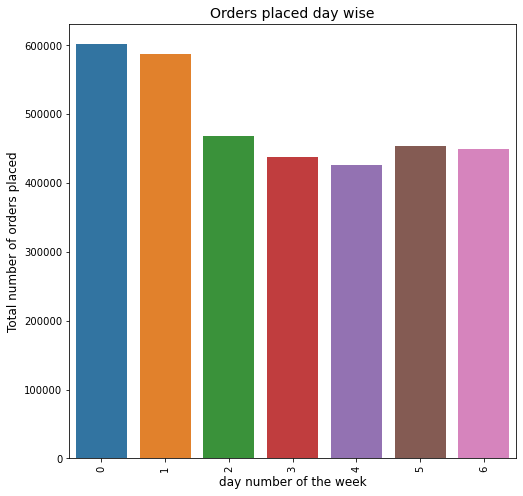

In [17]:
counts = orders_df['order_dow'].value_counts()
bar_plot(counts,'day number of the week','Total number of orders placed','Orders placed day wise')

<b>Observations - </b>
<hr/>
<li>0 - Saturday
<li>1 - Sunday
<li>2 - Monday
<li>3 - Tuesday
<li>4 - Wednesday
<li>5 - Thursday
<li>6 - Friday

<br/>
From the above plot we can see that maximum number of orders were placed during weekends i.e on Saturday and on Sunday. This 
infers that customers tend to go shopping more on weekends.    

<h3>4.3 During what time of the day were most ordered placed ?

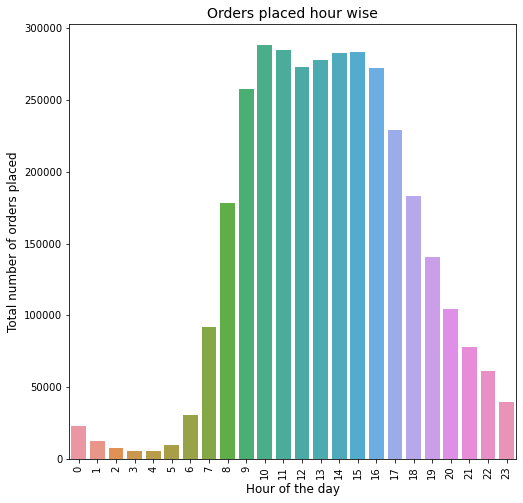

In [18]:
counts = orders_df['order_hour_of_day'].value_counts()
bar_plot(counts,'Hour of the day','Total number of orders placed','Orders placed hour wise')

<b>Observations</b>
<hr/>
<li>Most of the orders were placed between 9 am to 5 pm.
<li>We can see that during these hours on an average almost 25000 orders are being placed.

<h3>4.4 After how many days since the prior order is the current order being placed ?

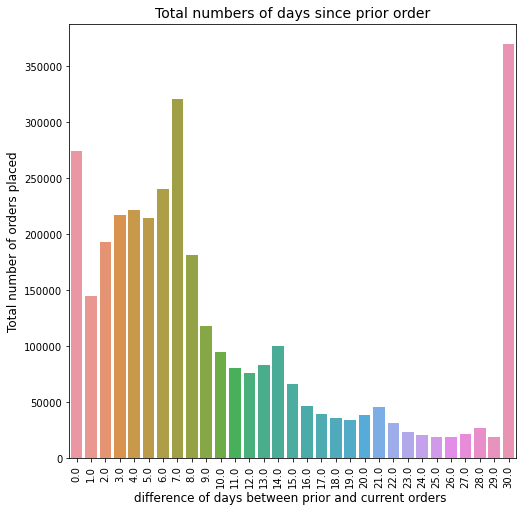

In [19]:
counts = orders_df['days_since_prior_order'].value_counts()
bar_plot(counts,'difference of days between prior and current orders ','Total number of orders placed','Total numbers of days since prior order')

<b>Observations - </b>
<hr/>
<li>Maximum number of orders are placed after a gap of 7 days and 30 days. This means that customers 
    place orders or shop more on weekly and monthly basis.
<li>There are a few orders being placed within a gap of 1 day.
<li>We can see that users tend to order on starting day of the week and ending day of the week.
<li>Maximum number of orders are placed during month end.    

<h3>4.5 How many orders did each customer place ?

In [20]:
print("Total number of unique customers - ",orders_df['user_id'].unique().max())

Total number of unique customers -  206209


In [21]:
#The maximum order number will give us the maximum orders placed by each user
max_orders_placed_df = orders_df.groupby('user_id')['order_number'].aggregate('max')

In [22]:
max_orders_placed_df.head()

user_id
1    11
2    15
3    13
4     6
5     5
Name: order_number, dtype: int64

In [23]:
max_orders_placed_df = max_orders_placed_df.value_counts()
max_orders_placed_df.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

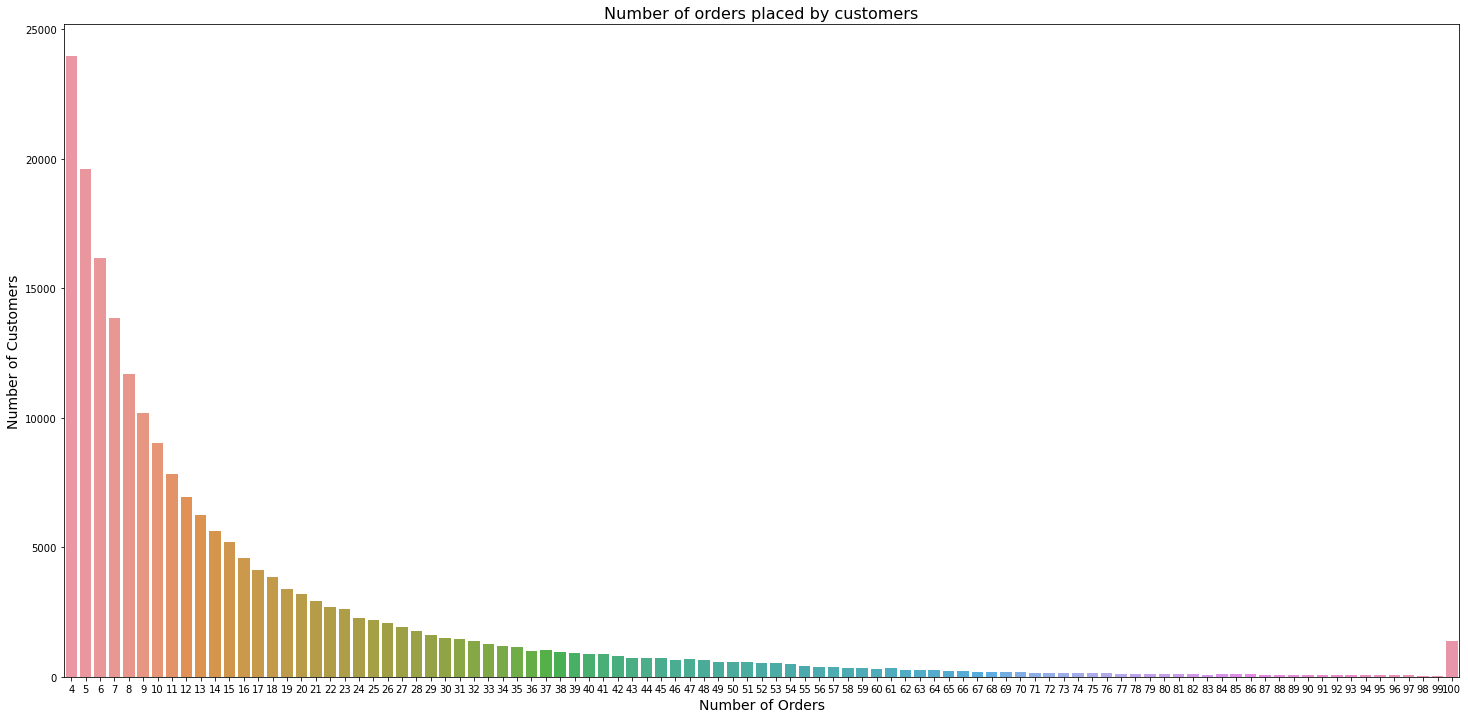

In [24]:
plt.figure(figsize=(25,12))
sns.barplot(max_orders_placed_df.index, max_orders_placed_df.values)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Number of Orders',fontsize = 14)
plt.title('Number of orders placed by customers', fontsize = 16)
plt.show() 

<b>Observations - </b>
<hr/>
<li>The above plot is a skewed graph where the graph keeps falling towards right
<li>Maximum number of customers have placed 4 orders i.e around 23986 customers have placed 4 orders
<li>Although the graph keeps falling customers who have placed 100 orders are more than customers who have placed orders between 30 to 99.    

<h3>4.6 Products Data

In [25]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<h3>4.7 Number of products in each department

In [26]:
prod_depart_df = products_df.merge(department_df)

In [27]:
prod_depart_df.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,16,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,Nacho Cheese White Bean Chips,107,19,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


In [28]:
department_count = prod_depart_df['department'].value_counts()

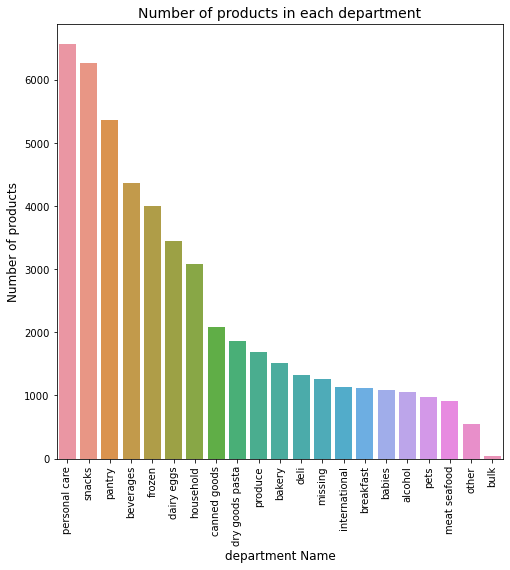

In [29]:
bar_plot(department_count,'department Name','Number of products','Number of products in each department')

<b>Observations - </b>
<hr/>
<li>We have around 21 department types sorted based on the number of products in each department.
<li>The top 5 departments are personal care,snacks,pantry,beverages and frozen.    

<h3>4.8 Number of products in each Aisle

In [30]:
prod_aisle_df = products_df.merge(aisles_df)

In [31]:
prod_aisle_df.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [32]:
aisle_count = prod_aisle_df['aisle'].value_counts()

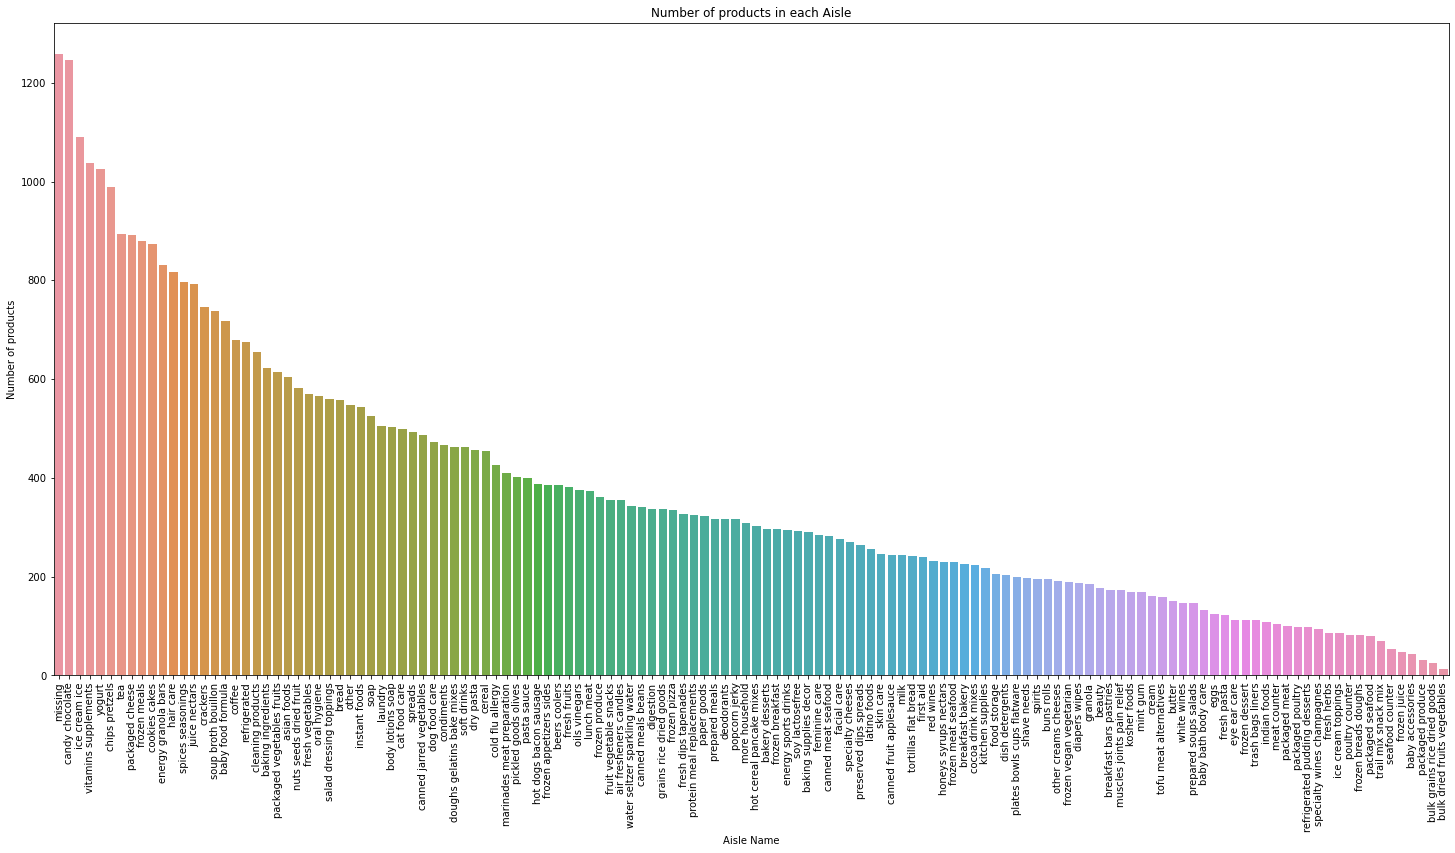

In [33]:
#bar_plot(aisle_count,'Aisle Name','Number of products','Number of products in each Aisle')
plt.figure(figsize=(25,12))
sns.barplot(aisle_count.index, aisle_count.values)
plt.ylabel('Number of products', fontsize = 10)
plt.xlabel('Aisle Name',fontsize = 10)
plt.title('Number of products in each Aisle', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show() 

<b>Observations - </b>
<hr/>
<li>Ignoring the missing values the top 5 aisles are Candy chocolate, Ice Cream , Vitamin Supplements
    Yogurt and Chips Pretzels.

<h3>4.9 Order Products Prior and Order Products Train

In [34]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [35]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


<h3> 4.10 Reordered Plots for prior and recent orders

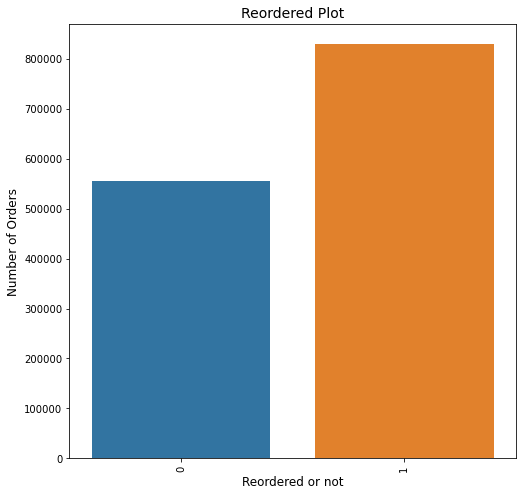

In [36]:
#Reordered Plot on the train orders or the recent orders
counts = order_products_train_df['reordered'].value_counts()
bar_plot(counts,'Reordered or not','Number of Orders','Reordered Plot')

In [37]:
# finding the percentage of reorders
print("Total number of products ordered - ",len(order_products_train_df))
print("Total number of Reorders placed - ",len(order_products_train_df[order_products_train_df['reordered'] == 1]))
print("Percentage Of Reorders - ",len(order_products_train_df[order_products_train_df['reordered']==1])/len(order_products_train_df)*100)

Total number of products ordered -  1384617
Total number of Reorders placed -  828824
Percentage Of Reorders -  59.859441275096295


<b>Observations - </b>
<hr/>
<li>Around 59.85% of the products are reordered.
<li>Thus 40.2% of the products are not reordered.   

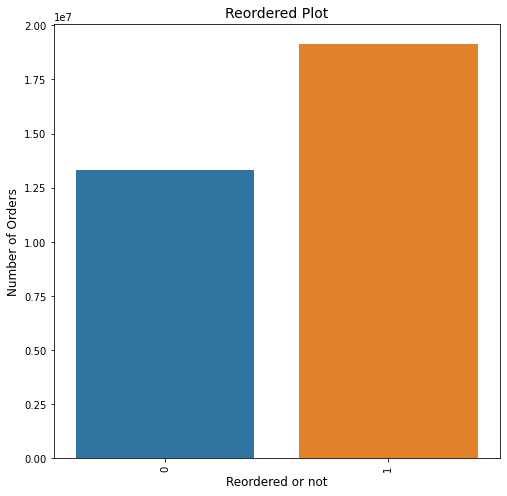

In [38]:
#Reordered Plot on the Prior orders
counts = order_products_prior_df['reordered'].value_counts()
bar_plot(counts,'Reordered or not','Number of Orders','Reordered Plot')

In [39]:
# finding the percentage of reorders
print("Total number of products ordered - ",len(order_products_prior_df))
print("Total number of Reorders placed - ",len(order_products_prior_df[order_products_prior_df['reordered'] == 1]))
print("Percentage Of Reorders - ",len(order_products_prior_df[order_products_prior_df['reordered']==1])/len(order_products_prior_df)*100)

Total number of products ordered -  32434489
Total number of Reorders placed -  19126536
Percentage Of Reorders -  58.969746679221615


<b>Observations - </b>
<hr/>
<li>Around 58.96% of the products are reordered.
<li>Thus 41.04% of the products are not reordered. 
<li>Also an other thing to note is there is no discrepancy here between the recent orders and prior orders when it comes to the percentage of products being reordered.    

In [8]:
#Merging the data frames with orders , products , aisles and department information
merged_data = pd.merge(order_products_prior_df, products_df, how='left', on='product_id')
merged_data = pd.merge(merged_data, orders_df, how='left', on='order_id')
merged_data = pd.merge(merged_data, department_df, how='left', on='department_id')
merged_data = pd.merge(merged_data, aisles_df, how='left', on='aisle_id')
merged_data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


<h3>Co-Relation Matrix

In [9]:
#Co-relation matrix
merged_data.corr()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000082,-0.000320,-0.000253,-0.000063,-0.000229,-0.000482,-0.000543,0.001205,0.000652,0.000656
product_id,-0.000082,1.000000,0.005529,0.003718,0.002254,-0.028503,0.000080,-0.001925,-0.002350,0.000942,0.000563
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024,0.009451,0.029437,0.000729,-0.004228,-0.009071,-0.014805,0.050260
reordered,-0.000253,0.003718,-0.133024,1.000000,0.003924,-0.039371,-0.000862,0.306840,-0.006949,-0.023300,-0.024465
aisle_id,-0.000063,0.002254,0.009451,0.003924,1.000000,0.062203,-0.000114,-0.000293,-0.001997,-0.001134,0.005357
department_id,-0.000229,-0.028503,0.029437,-0.039371,0.062203,1.000000,0.000056,0.000529,0.004398,-0.008837,0.000937
user_id,-0.000482,0.000080,0.000729,-0.000862,-0.000114,0.000056,1.000000,-0.000768,-0.001630,-0.000415,0.000448
order_number,-0.000543,-0.001925,-0.004228,0.306840,-0.000293,0.000529,-0.000768,1.000000,0.015209,-0.040049,-0.257864
order_dow,0.001205,-0.002350,-0.009071,-0.006949,-0.001997,0.004398,-0.001630,0.015209,1.000000,0.012176,-0.026520
order_hour_of_day,0.000652,0.000942,-0.014805,-0.023300,-0.001134,-0.008837,-0.000415,-0.040049,0.012176,1.000000,-0.000195


In [13]:
corr = merged_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000082,-0.000320,-0.000253,-0.000063,-0.000229,-0.000482,-0.000543,0.001205,0.000652,0.000656
product_id,-0.000082,1.000000,0.005529,0.003718,0.002254,-0.028503,0.000080,-0.001925,-0.002350,0.000942,0.000563
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024,0.009451,0.029437,0.000729,-0.004228,-0.009071,-0.014805,0.050260
reordered,-0.000253,0.003718,-0.133024,1.000000,0.003924,-0.039371,-0.000862,0.306840,-0.006949,-0.023300,-0.024465
aisle_id,-0.000063,0.002254,0.009451,0.003924,1.000000,0.062203,-0.000114,-0.000293,-0.001997,-0.001134,0.005357
department_id,-0.000229,-0.028503,0.029437,-0.039371,0.062203,1.000000,0.000056,0.000529,0.004398,-0.008837,0.000937
user_id,-0.000482,0.000080,0.000729,-0.000862,-0.000114,0.000056,1.000000,-0.000768,-0.001630,-0.000415,0.000448
order_number,-0.000543,-0.001925,-0.004228,0.306840,-0.000293,0.000529,-0.000768,1.000000,0.015209,-0.040049,-0.257864
order_dow,0.001205,-0.002350,-0.009071,-0.006949,-0.001997,0.004398,-0.001630,0.015209,1.000000,0.012176,-0.026520
order_hour_of_day,0.000652,0.000942,-0.014805,-0.023300,-0.001134,-0.008837,-0.000415,-0.040049,0.012176,1.000000,-0.000195


<b>Observations - </b>
<hr/>
<li>Add to cart order has a negative corelation with reordered. That is, if add to cart order is less or in the top 10 then the probability of product being reordered is more.
<li>Order number has a positive corelation with reordered. More the number of orders, probability of it containing products to be reordered is more.
<li>Order number has a negative corelation with days since prior order. This is obvious because more the gap between orders being placed less is the number of orders placed. 

<h3>4.11 Best Selling Department

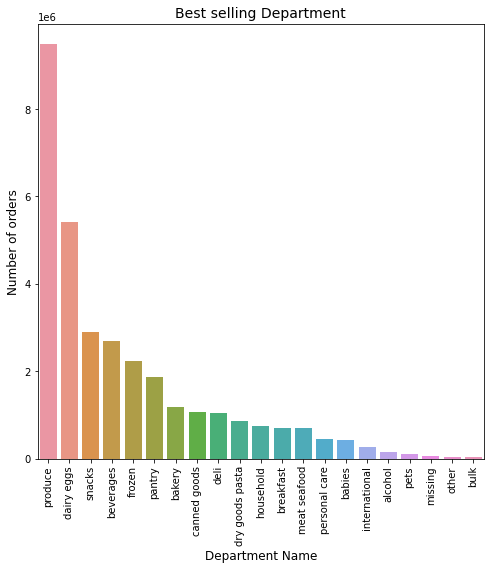

In [41]:
counts = merged_data['department'].value_counts()
bar_plot(counts,'Department Name','Number of orders','Best selling Department')

<b>Observations - </b>
<hr/>
<li>The top 5 best selling departments are produce,dairy eggs,snacks ,beverages and frozen.
<li>We do not have any data on revenue generated per department so we cannot know which department is most profitable so we can only have a say here in most number of sales.    

<h4> But, what is "produce" department ? Let's break it by aisle 

In [42]:
produce_department_df = merged_data[merged_data['department'] == 'produce']
produce_department_df['aisle'].value_counts()

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
fresh herbs                    377741
packaged produce               276028
Name: aisle, dtype: int64

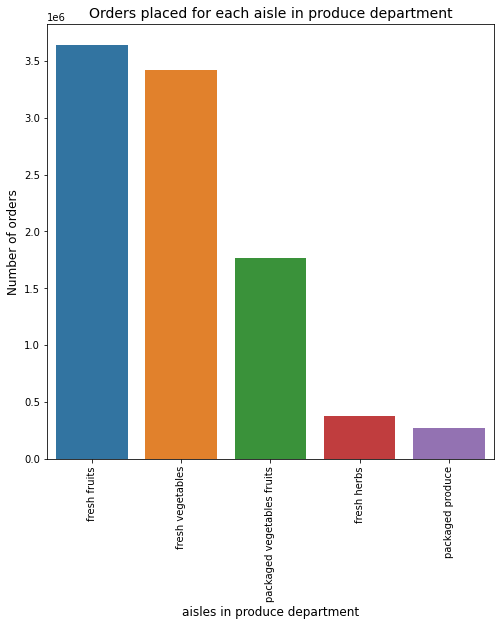

In [43]:
counts = produce_department_df['aisle'].value_counts()
bar_plot(counts,'aisles in produce department','Number of orders','Orders placed for each aisle in produce department')

<b>Observations - </b>
<hr/>
<li>The produce department refers to fresh fruits , fresh vegetables , packaged fruits and vegetables and fresh herbs.
<li>In the produce department maximum orders are placed for fresh fruits and least for packaged products in produce.
<li>The fresh vegetables aisle is not so behind. This would also give us a hint that most of the customers who order here seem to diet cautious and prefer healthy products to beverages,packaged products,snacks,etc.    

<h3>4.12 Best Selling Aisle Overall

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
Name: aisle, dtype: int64


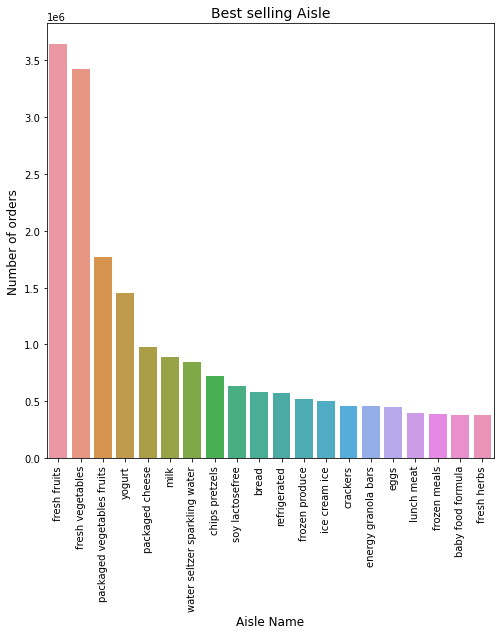

In [44]:
counts = merged_data['aisle'].value_counts()[:20]
print(counts.head())
bar_plot(counts,'Aisle Name','Number of orders','Best selling Aisle')

<b>Observations - </b>
<hr/>
<li>The maximum orders are placed for fresh fruits , fresh vegetables , yogurt.
<li>This seems great! Majority of the orders are placed for fresh fruits and vegetables.

<h3>4.13 Which Products Were Ordered The Most ?

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Name: product_name, dtype: int64


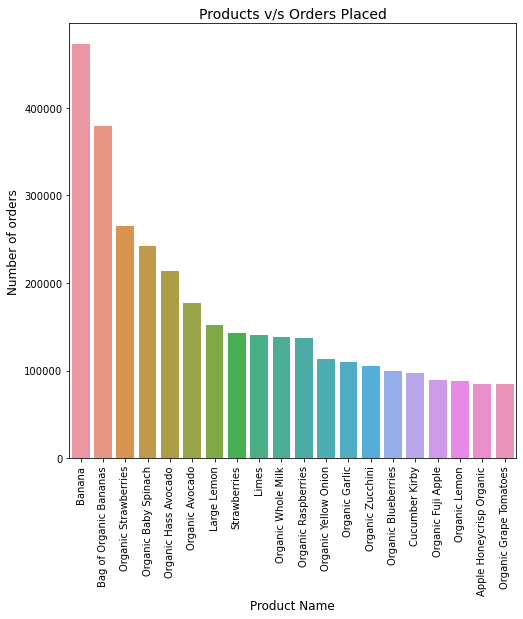

In [45]:
counts = merged_data['product_name'].value_counts()[:20]
print(counts.head())
bar_plot(counts,'Product Name','Number of orders','Products v/s Orders Placed')

<b>Observations - </b>
<hr/>
<li>We had already figured out that maximum orders were placed for fruits and vegetables and for the produce department. Thus as expected we can see that fruits such as banana,Avocado and spinach are most ordered.

<h4> Let's look at the products that were reordered the most

Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Name: product_name, dtype: int64


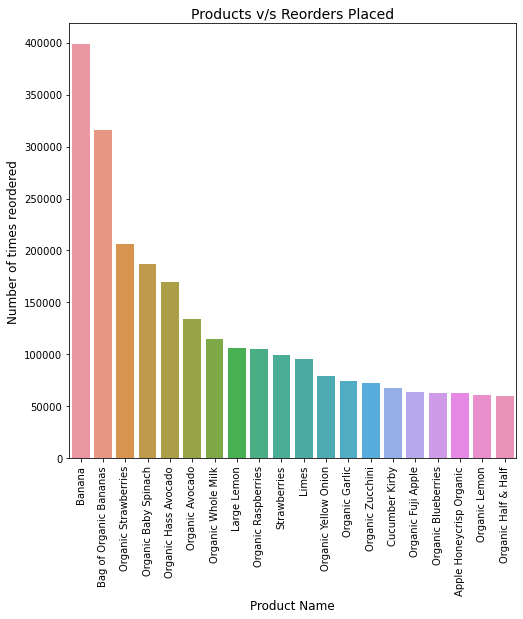

In [46]:
counts = merged_data[merged_data['reordered'] == 1]['product_name'].value_counts()[:20]
print(counts.head())
bar_plot(counts,'Product Name','Number of times reordered','Products v/s Reorders Placed')

<AxesSubplot:xlabel='product_name,reordered', ylabel='Number of times reordered'>

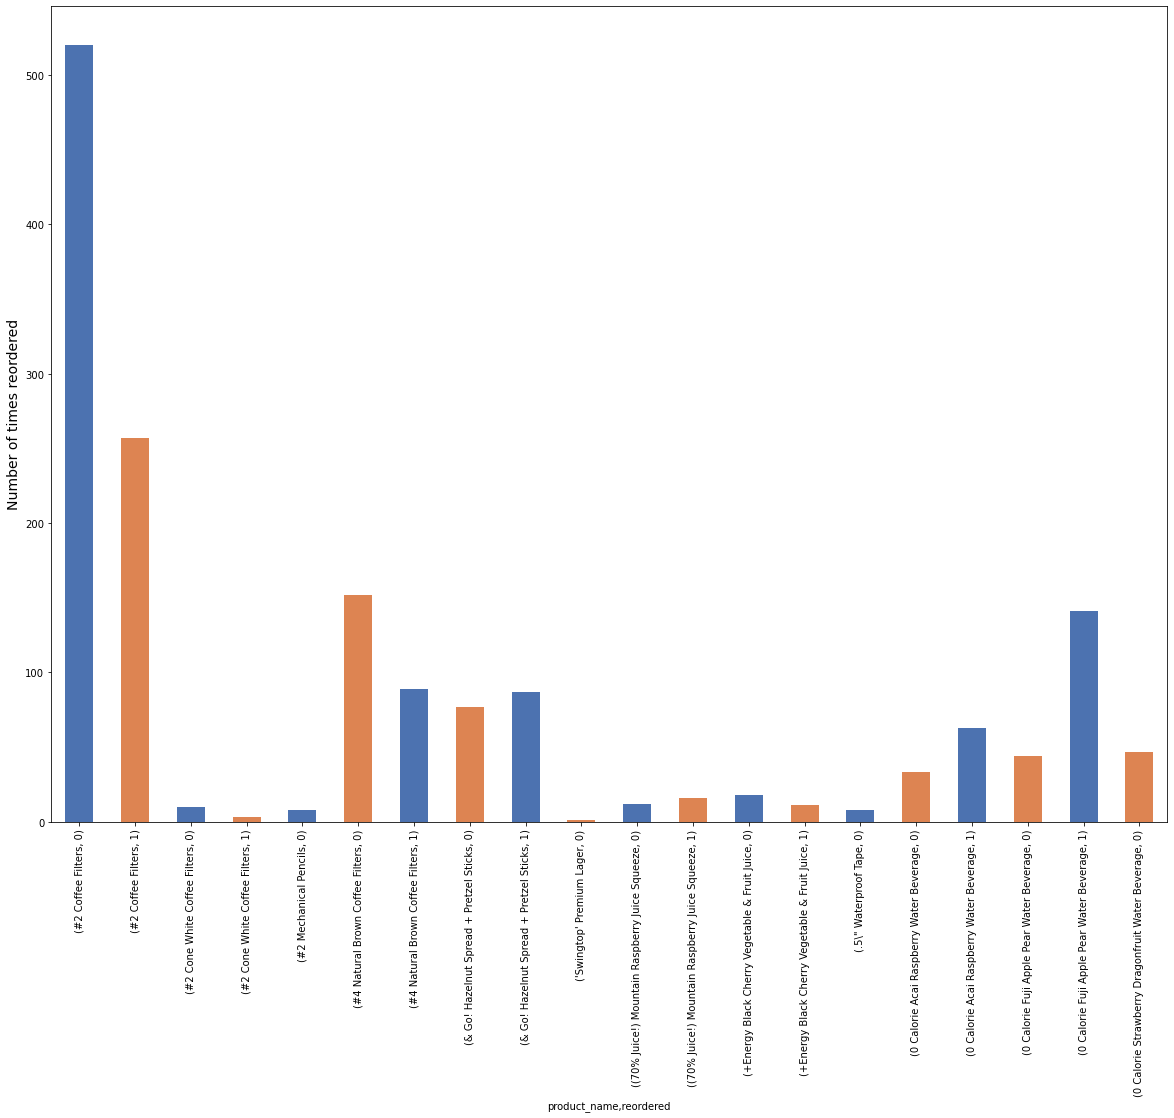

In [53]:
plt.figure(figsize=(20,15))
groups = merged_data.groupby(['product_name','reordered']).size()
groups = groups[:20]
plt.ylabel('Number of times reordered', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observations - </b>
<hr/>
<li>This is quite similar to the above finding but this plot tells the exact number of times each of the top 20 products being reorderd. Banana is at top spot with 400000 reorders.

<h3>4.14 Reorder v/s Day Of The Week

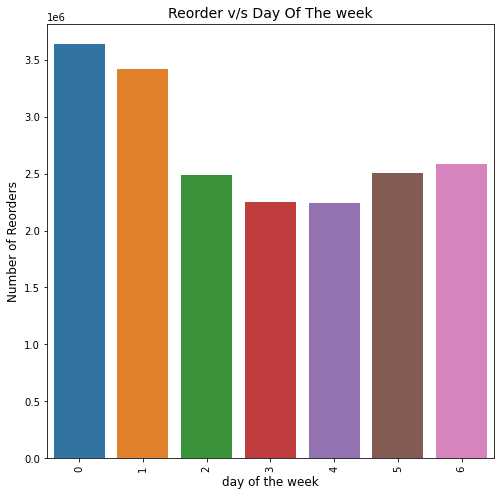

In [7]:
counts = merged_data[merged_data['reordered'] == 1]['order_dow'].value_counts()
bar_plot(counts,'day of the week','Number of Reorders','Reorder v/s Day Of The week')

<AxesSubplot:xlabel='order_dow,reordered', ylabel='Number Of Reorders'>

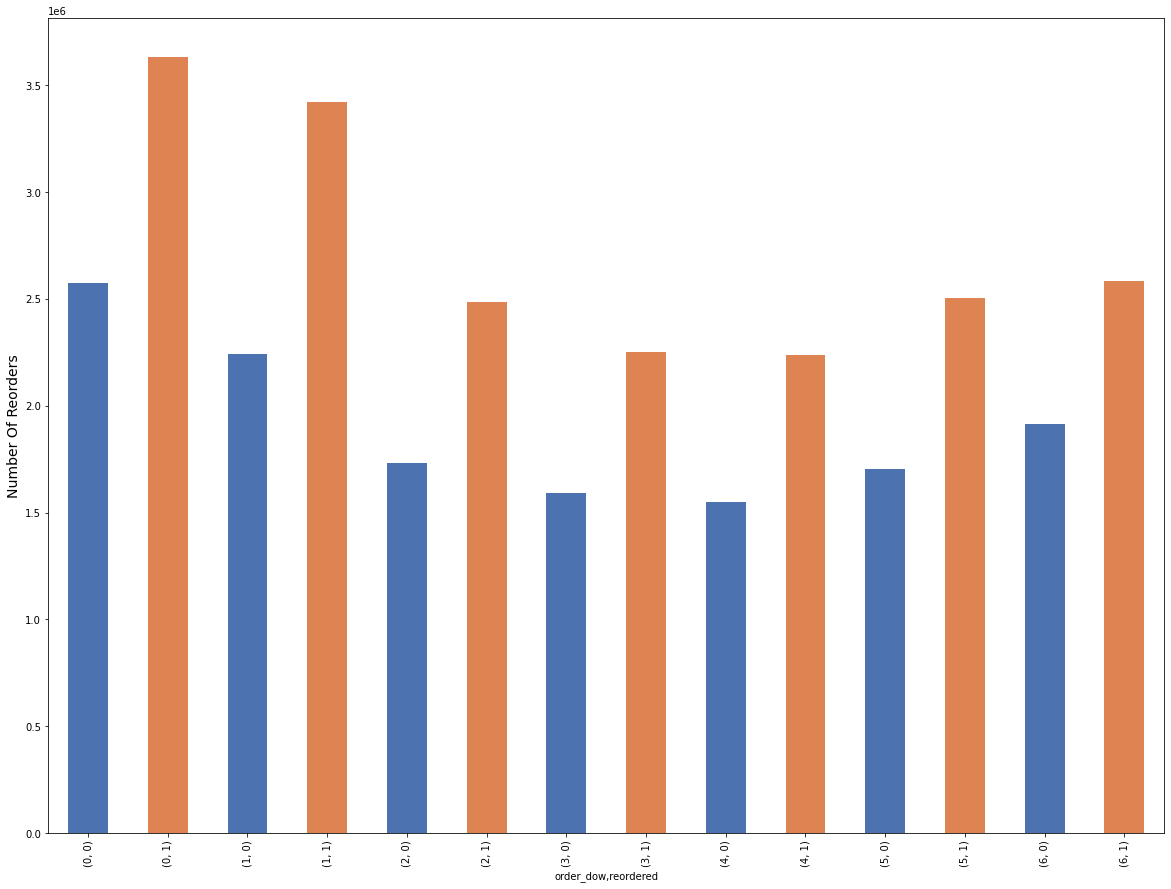

In [46]:
plt.figure(figsize=(20,15))
groups = merged_data.groupby(['order_dow','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observations - </b>
<hr/>
<li>Maximum reorders were done on a Saturday.
<li>Least reorders were done on a Wednesday.

<h3>4.15 Reorder v/s Hour Of The Day

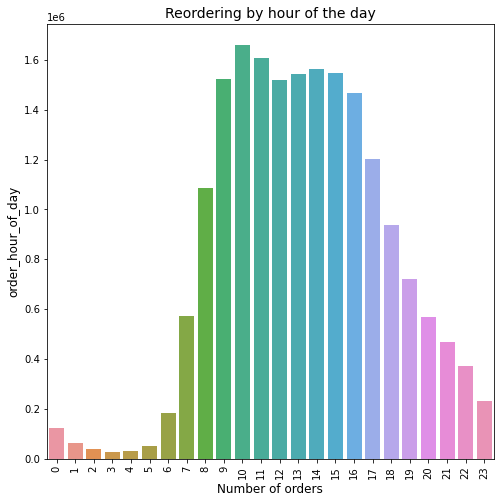

In [7]:
counts = merged_data[merged_data['reordered']==1]['order_hour_of_day'].value_counts()
bar_plot(counts, 'Number of orders', 'order_hour_of_day', 'Reordering by hour of the day')

<AxesSubplot:xlabel='order_hour_of_day,reordered', ylabel='Number Of Reorders'>

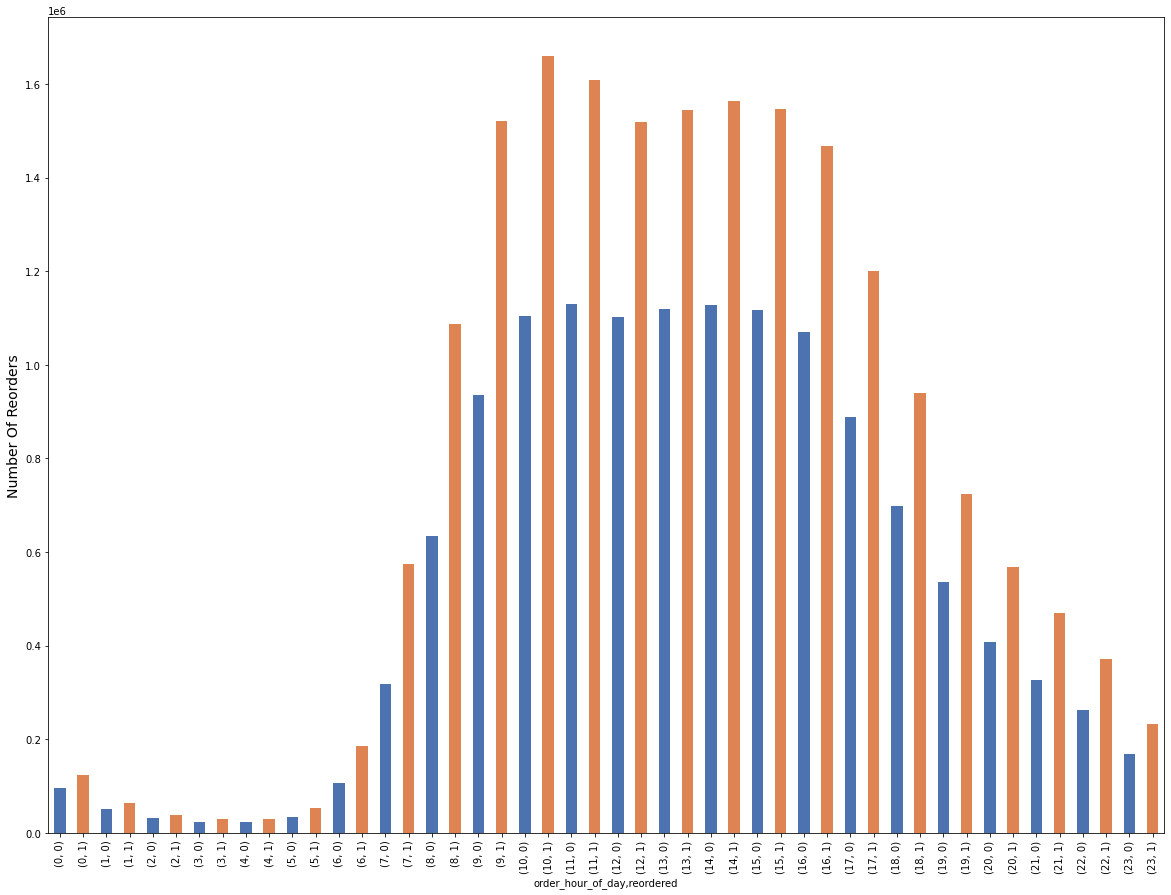

In [47]:
plt.figure(figsize=(20,15))
groups = merged_data.groupby(['order_hour_of_day','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observations - </b>
<hr/>
<li>Maximum reorders are done at around 9 a.m.
<li>Reorder rate is high between 8 a.m and 9 p.m.
<li>Reorder rate is least during 1 a.m and 5 a.m.   

<h3>4.16 Reorder v/s Add To Cart Order

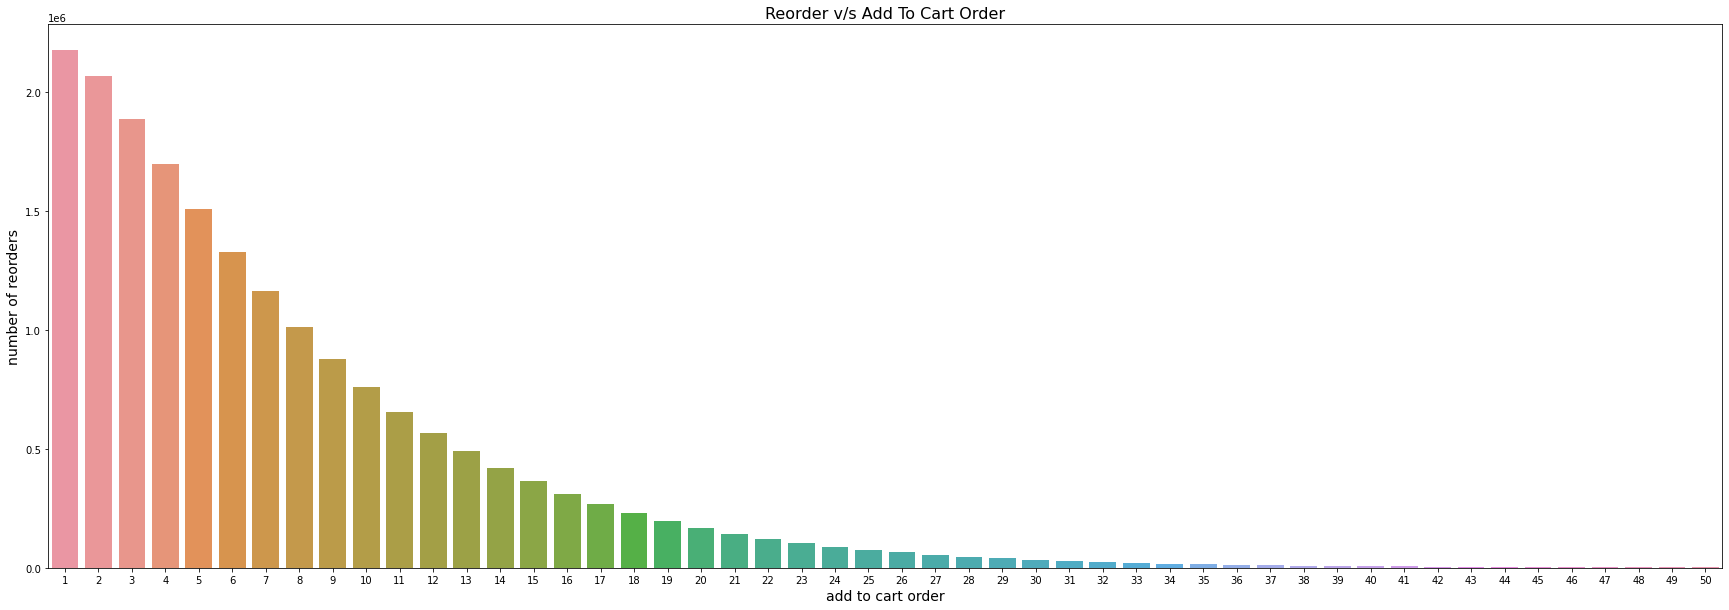

In [49]:
counts = merged_data[merged_data['reordered'] == 1]['add_to_cart_order'].value_counts()[:50]
plt.figure(figsize=(30,10))
sns.barplot(counts.index, counts.values)
plt.ylabel('number of reorders', fontsize = 14)
plt.xlabel('add to cart order',fontsize = 14)
plt.title('Reorder v/s Add To Cart Order', fontsize = 16)
plt.show()

<b>Observations - </b>
<hr/>
<li>The above plot clearly tells that higher the product is placed in the add to cart order more are the chances of being reordered.
<li>Products placed from 1 to 18 in add to cart order seem to have a chance of being reordered.
<li>Products placed from 25 and above inthe add to cart order have very minimal chance of being reordered.  

<h3>4.17 Reorder v/s Days Since Prior Order

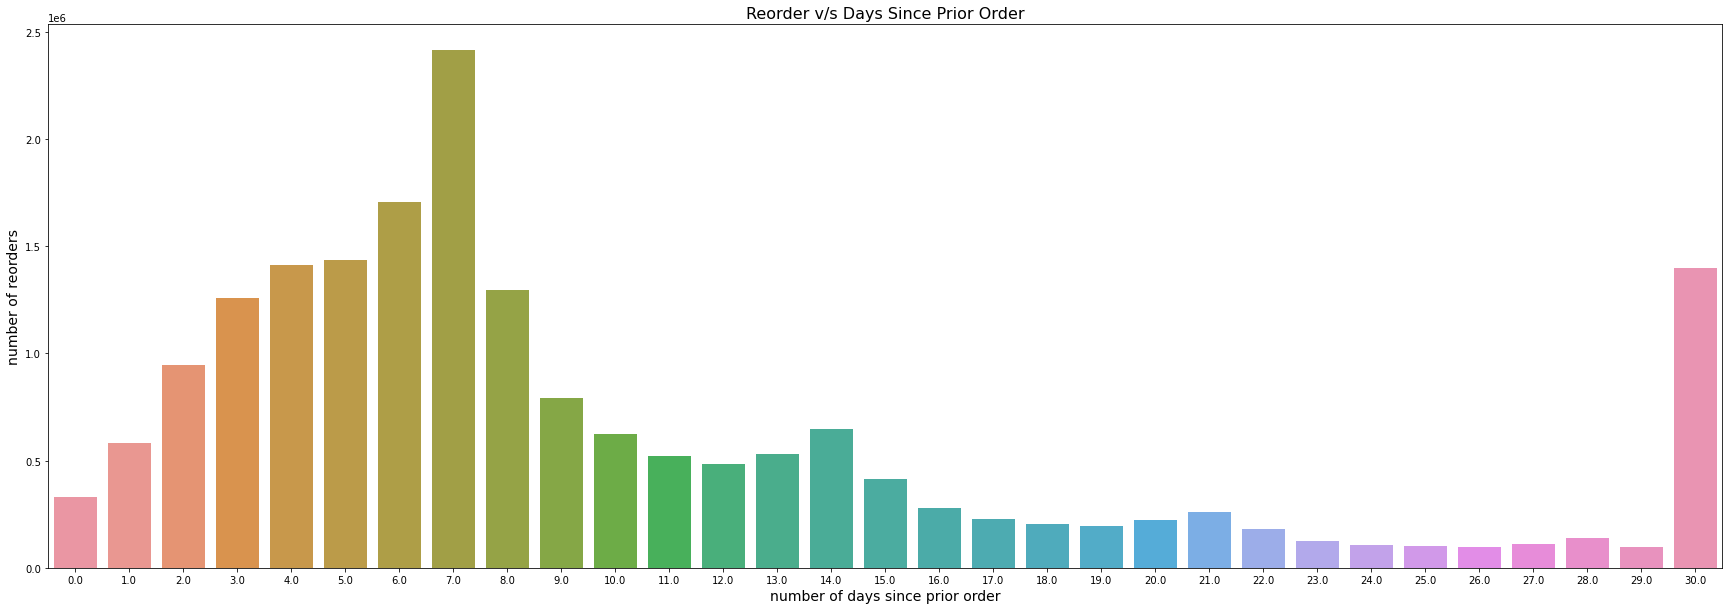

In [50]:
counts = merged_data[merged_data['reordered'] == 1]['days_since_prior_order'].value_counts()
plt.figure(figsize=(30,10))
sns.barplot(counts.index, counts.values)
plt.ylabel('number of reorders', fontsize = 14)
plt.xlabel('number of days since prior order',fontsize = 14)
plt.title('Reorder v/s Days Since Prior Order', fontsize = 16)
plt.show()

<AxesSubplot:xlabel='days_since_prior_order,reordered', ylabel='Number Of Reorders'>

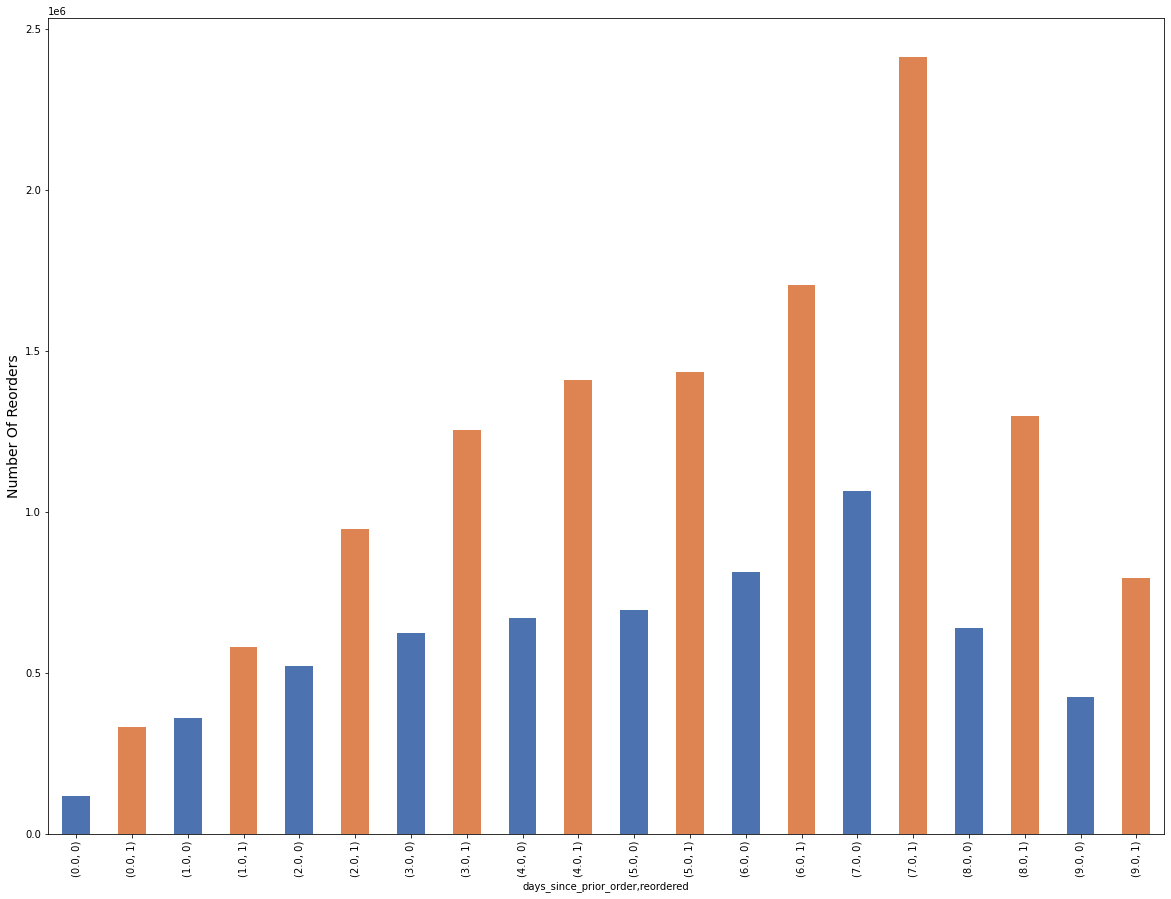

In [48]:
plt.figure(figsize=(20,15))
groups = merged_data.groupby(['days_since_prior_order','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups = groups[:20]
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observations - </b>
<hr/>
<li>We can clearly say that maximum number of reorders are done after a gap of 7 days.
<li>Most number of reorders are made after a gap of 5 to 7 days and after 30 days.
<li>Least number of reorders are made during a gap of 15 to 29 days that is somewhere during the mid-week.
<li>Thus, majority of the reorders are made either during weekend or monthend.    

<h3>4.18 Which Department has the maximum reorders ?(Reorders v/s Departments)

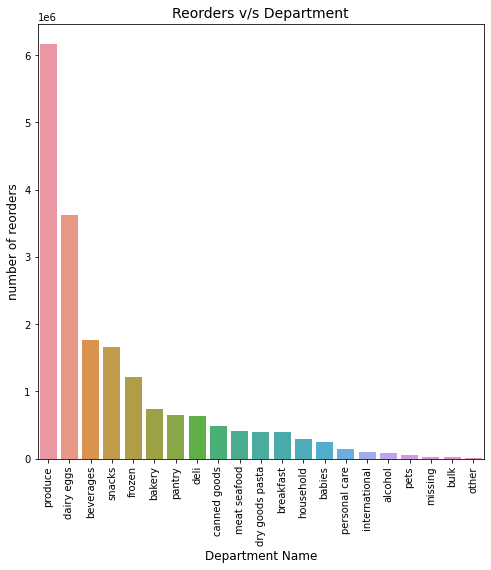

In [51]:
counts = merged_data[merged_data['reordered'] == 1]['department'].value_counts()
bar_plot(counts,'Department Name','number of reorders','Reorders v/s Department')

<AxesSubplot:xlabel='department,reordered', ylabel='Number Of Reorders'>

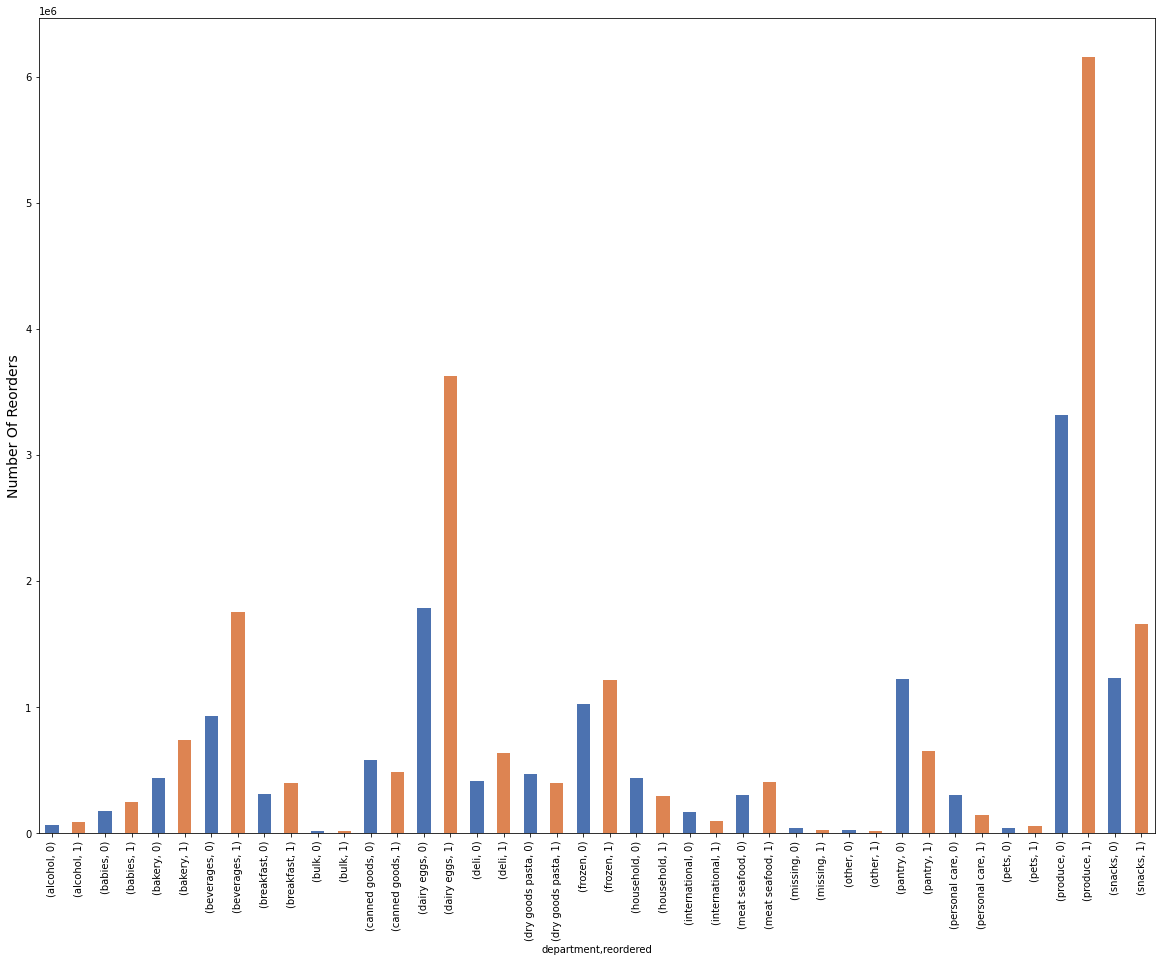

In [49]:
plt.figure(figsize=(20,15))
groups = merged_data.groupby(['department','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observations - </b>
<hr/>
<li>As expected maximum number of reorders came from produce department(Fresh fruits and vegetables).
<li>Least number of reorders came from alcohol,pets,personal care department.
<li>Dairy eggs department has some good amount of reorders.     

<h3>4.19 Which Aisle has the maximum reorders ?(Reorders v/s Aisles)

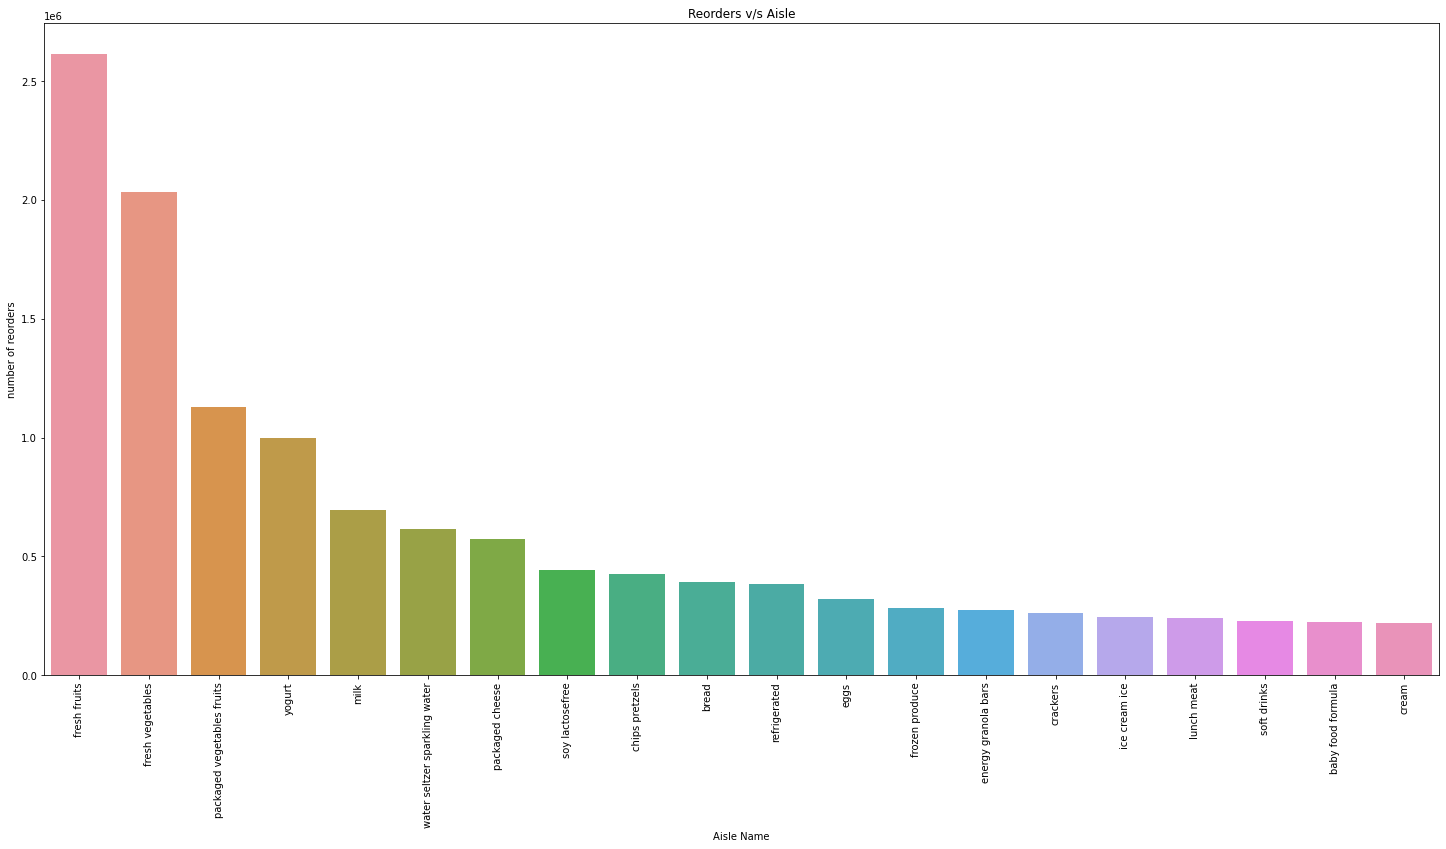

In [52]:
counts = merged_data[merged_data['reordered'] == 1]['aisle'].value_counts()[:20]
plt.figure(figsize=(25,12))
sns.barplot(counts.index, counts.values)
plt.ylabel('number of reorders', fontsize = 10)
plt.xlabel('Aisle Name',fontsize = 10)
plt.title('Reorders v/s Aisle', fontsize = 12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='aisle,reordered', ylabel='Number Of Reorders'>

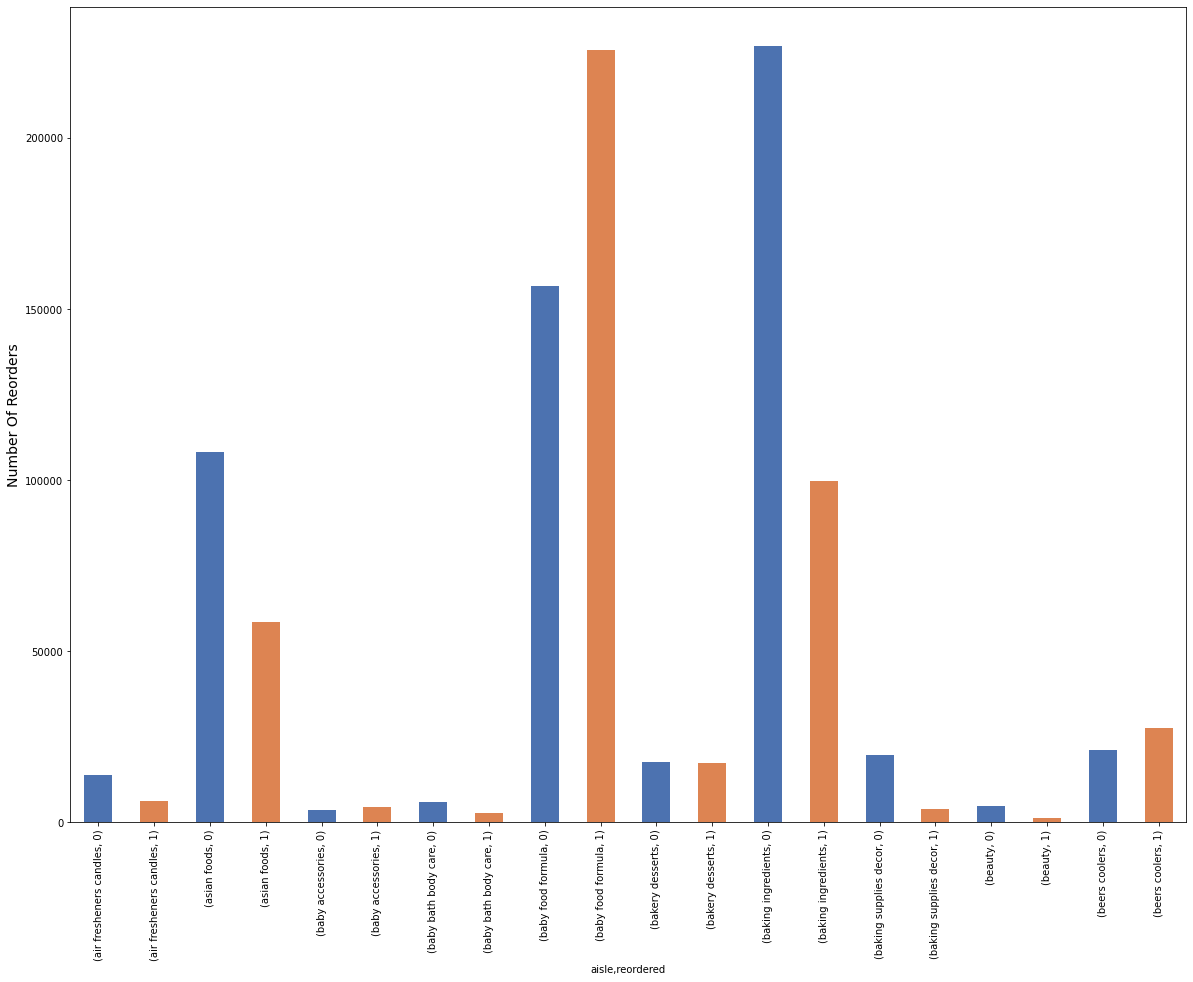

In [50]:
plt.figure(figsize=(20,15))
groups = merged_data.groupby(['aisle','reordered']).size()
plt.ylabel('Number Of Reorders', fontsize = 14)
groups =groups[:20]
groups.plot.bar(color=['#4c72b0','#dd8452'])

<b>Observations - </b>
<hr/>
<li>Maximum number of reorders came from Fresh fruits and vegetables aisle.


<h3>4.20 Box plot between Reorderd and days since prior order

[]

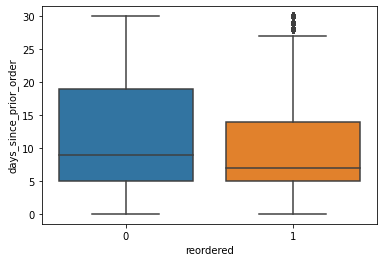

In [58]:
sns.boxplot(x='reordered',y='days_since_prior_order',data=merged_data)
plt.plot()

<b>Observations - </b>
<hr/>
<li>The first getaway from this box plot would be we seem to have a few outliers. We need to remove those outliers.
<li>The box length is less if reordered is 1 which means the data spread is less. Likewise the data spread is more if reordered is 0. This gives us an understanding that reorders are done once in a while and from the above bar plots that least number of reorders are made during a gap of 10 to 29 days. 

<h3>4.21 Reorder ratio vs day of the week

In [17]:
#Calculating the reorder ratio
grouped_df = merged_data.groupby(['order_dow'])['reordered'].aggregate("mean")
grouped_df

order_dow
0    0.585276
1    0.603843
2    0.589771
3    0.586272
4    0.590979
5    0.595470
6    0.574369
Name: reordered, dtype: float64

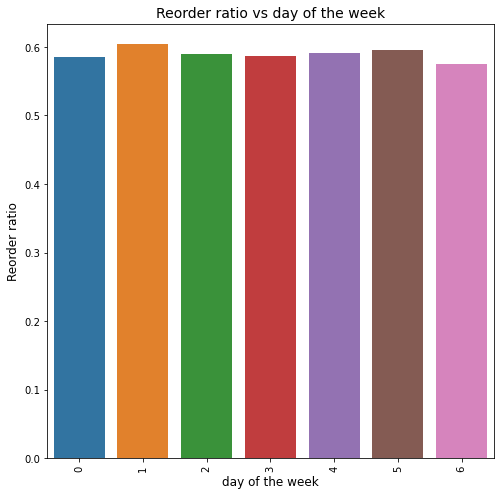

In [16]:
bar_plot(grouped_df,"day of the week","Reorder ratio","Reorder ratio vs day of the week")

<b>Observations - </b>
<hr/>
<li>We can see that the reorder ratio is maximum during weekend. Which means maximum reorders are done during weekend.

<h3>4.22 Reorder ratio vs Order Hour of day

In [19]:
#Calculating the reorder ratio
grouped_df = merged_data.groupby(['order_hour_of_day'])['reordered'].aggregate("mean")
grouped_df.head()

order_hour_of_day
0    0.565500
1    0.557114
2    0.554455
3    0.559498
4    0.571195
Name: reordered, dtype: float64

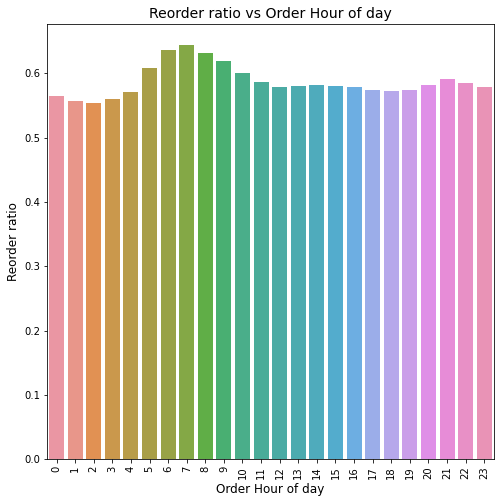

In [20]:
bar_plot(grouped_df,"Order Hour of day","Reorder ratio","Reorder ratio vs Order Hour of day")

<b>Observations - </b>
<hr/>
<li>Going with mean of order hour of day most reorders are done at 7 a.m
<li>Least mean reorders are done between 1 am to 2 am.

<h2>5. Conclusions From EDA

<li>The dataset consists of 6 files, each containing different information of the insta-cart. It         contains information about the products, the aisles on which the product is placed, what product was reordered, after how many days did the user come to shop etc. The dataset is divided into 3 parts Priors, Train, and Test. Prior orders contain information about users and their previous orders.
<li>There are a total of 21 departments and 134 aisles.
<li>Maximum number of orders were placed during weekends i.e on Saturday and on Sunday. This infers that customers tend to shop more on weekends. 
<li>Talking about peak hours, most of the orders were placed between 9 am to 5 pm.    
<li>Maximum number of orders were placed after a gap of 7 days and 30 days. This means that customers place orders or shop more on weekly and monthly basis.
<li>Maximum number of customers have placed 4 orders i.e around 23986 customers have placed 4 orders.
<li>The top 5 best selling departments are produce,dairy eggs,snacks ,beverages and frozen.
We do not have any data on revenue generated per department so we cannot know which department is most profitable so we can only have a say here in most number of sales.
<li>The produce department refers to fresh fruits , fresh vegetables , packaged fruits and vegetables and fresh herbs.In the produce department maximum orders are placed for fresh fruits and least for packaged products in produce.The fresh vegetables aisle is not so behind. This would also give us a hint that most of the customers who order here seem to diet cautious and prefer healthy products to beverages,packaged products,snacks,etc.    
<li>Thus as expected we can see that fruits such as banana,Avocado and spinach are most ordered products. Banana is at top spot with 400000 reorders.
<li>Maximum reorders were done on a Saturday. Least reorders were done on a Wednesday.
<li>Reorder rate is high between 8 a.m and 9 p.m.
<li>Products placed from 1 to 18 in add to cart order seem to have a chance of being reordered. Products placed from 25 and above inthe add to cart order have very minimal chance of being reordered.    
<li>Majority of the reorders are made either during weekend or monthend.    
<li>Also, maximum number of reorders come from the produce department(Fresh fruits and vegetables).   